# Линейная регрессия

In [94]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

In [186]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.model_selection import cross_val_score

In [187]:
data = pd.read_csv("train.csv", sep=',')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


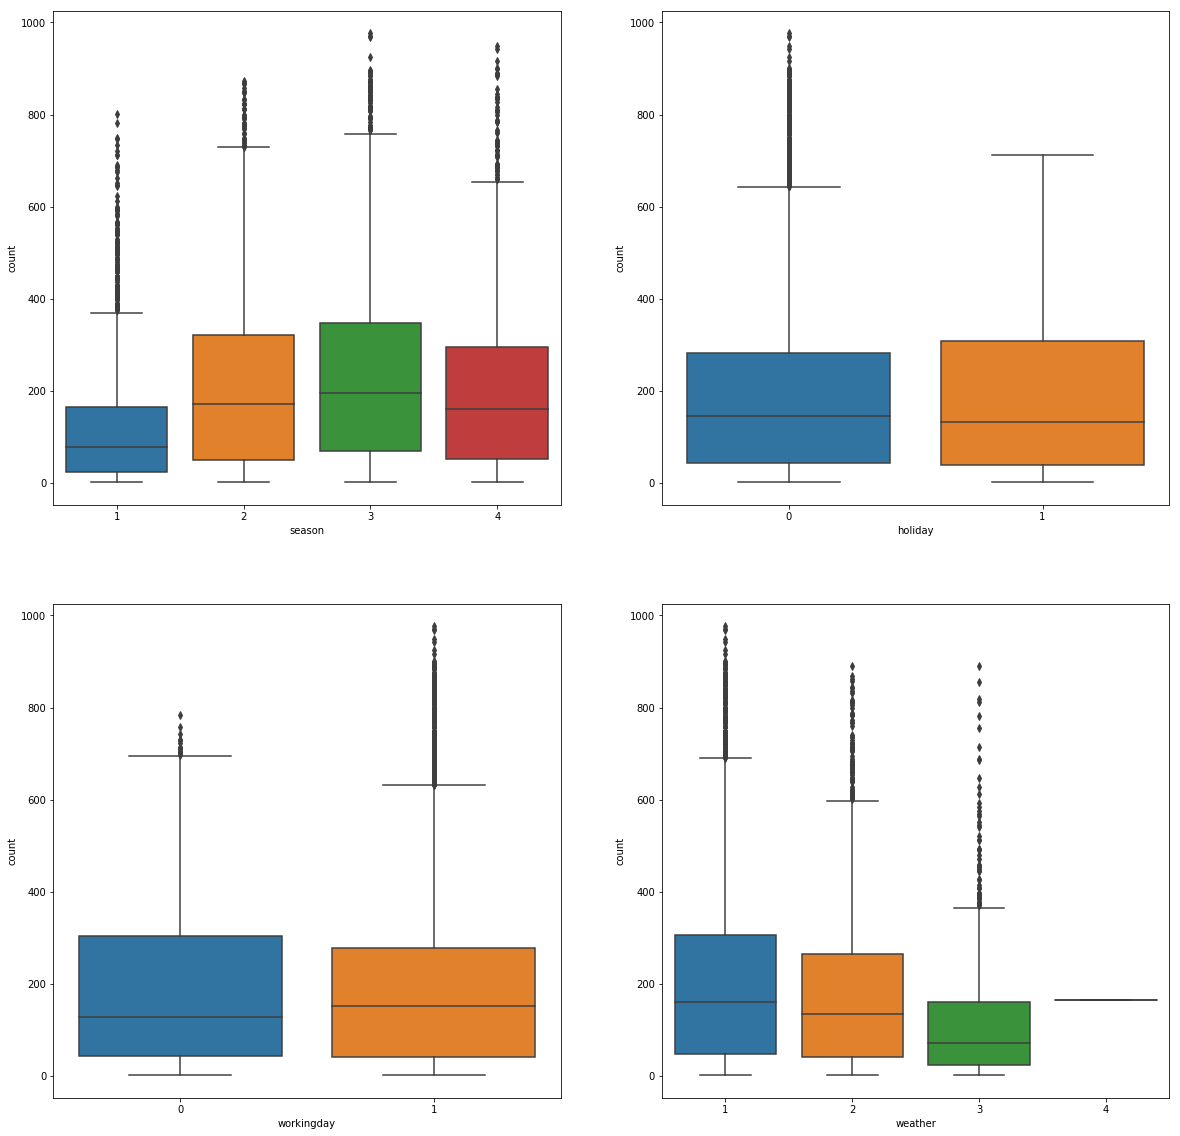

In [188]:
fig,axes = plt.subplots(ncols=2 ,nrows=2)
fig.set_size_inches(20,20)
sns.boxplot(data=data,x='season',y='count',ax=axes[0][0])
sns.boxplot(data=data,x='holiday',y='count',ax=axes[0][1])
sns.boxplot(data=data,x='workingday',y='count',ax=axes[1][0])
sns.boxplot(data=data,x='weather',y='count',ax=axes[1][1])

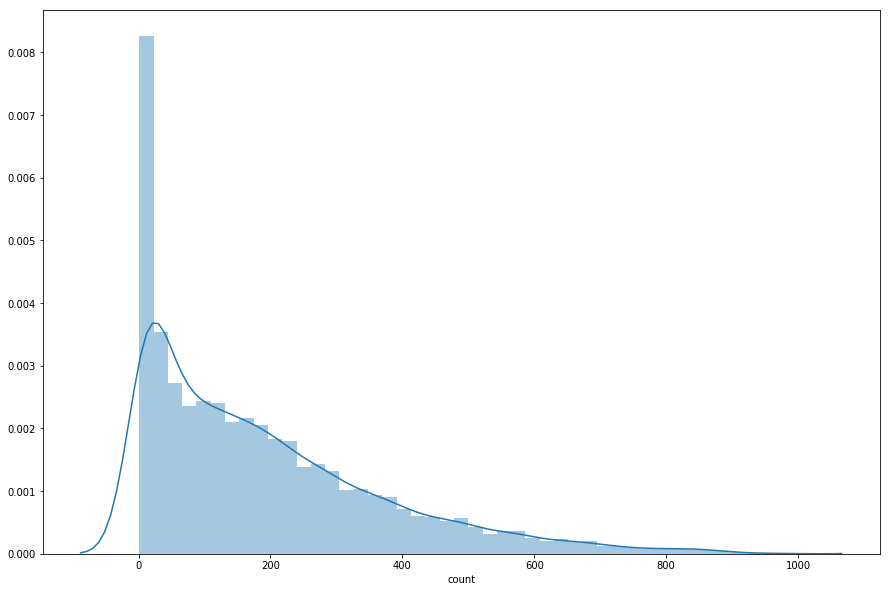

In [189]:
fig = plt.figure(figsize=(15,10))
sns.distplot(data['count'])
plt.show()

In [190]:
data['datetime'] = data.apply(pd.to_datetime)
data['month'] = data['datetime'].apply(lambda x: x.month)
data['hour'] = data['datetime'].apply(lambda x: x.hour)
data =  data.drop(['datetime', 'casual', 'registered'], axis=1)
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,1,4


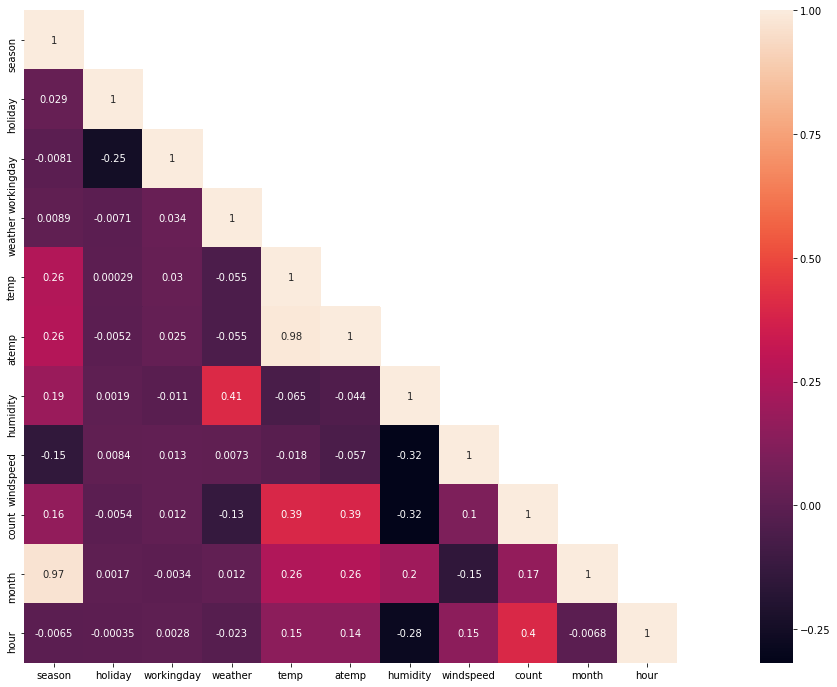

In [191]:
cor_mat = data.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

### registered и casual сильно кореллируют с count, потому что их сумма и есть count
### temp atemp тоже кореллируют
### убираем seasons оставляем month

In [192]:
n = data['count'].values
data = data.drop(['count', 'atemp', 'season'], axis=1)

In [193]:
X_train, X_test, Y_train, Y_test = train_test_split(data, n, test_size=0.2, random_state=0)
print(data.shape, X_train.shape, X_test.shape)

(10886, 8) (8708, 8) (2178, 8)


### Строим регрессию с категориальными признаками

In [194]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
print("mean squared error:", (mse(Y_test, Y_pred)))
scores = cross_val_score(lr, X_test, Y_test, cv=10)
print("mean cross validation score:", np.mean(scores))

mean squared error: 22274.109133896694
mean cross validation score: 0.3256435274846047


In [195]:
data = data.drop(['holiday', 'workingday', 'weather', 'hour', 'month'], axis=1)
data.head(2)

,temp,humidity,windspeed
0,9.84,81,0.0
1,9.02,80,0.0


In [196]:
X_train, X_test, Y_train, Y_test = train_test_split(data, n, test_size=0.2, random_state=0)
print(data.shape, X_train.shape, X_test.shape)

(10886, 3) (8708, 3) (2178, 3)


### Строим регрессию без категориальных признаков

In [197]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
print("mean squared error:", (mse(Y_test, Y_pred)))
scores = cross_val_score(lr, X_test, Y_test, cv=10)
print("mean cross validation r2-score:", np.mean(scores))

mean squared error: 24997.158156688023
mean cross validation r2-score: 0.24331585622800983


### MSE стал больше

In [176]:
data = pd.read_csv("train.csv", sep=',')
data['datetime'] = data.apply(pd.to_datetime)
data['month'] = data['datetime'].apply(lambda x: x.month)
data['hour'] = data['datetime'].apply(lambda x: x.hour)
categ = pd.DataFrame(data=data, columns=['holiday', 'workingday', 'weather', 'hour', 'month'])
data = data.drop(['datetime', 'casual', 'registered', 'holiday', 'workingday', 'weather', 'season', 'atemp', 'hour', 'month'], axis=1)
n = data['count'].values
data = data.drop(['count'], axis=1)
data.head(2)

,temp,humidity,windspeed
0,9.84,81,0.0
1,9.02,80,0.0


### Делаем OneHotEncode

In [177]:
enc = OneHotEncoder()
enc.fit(categ)
categ = enc.transform(categ).toarray()
categ = pd.DataFrame(categ)
categ.shape

(10886, 44)

In [178]:
data = data.join(categ)
data.shape

(10886, 47)

In [179]:
data.head(2)

,temp,humidity,windspeed,0,1,2,3,4,5,6,...,34,35,36,37,38,39,40,41,42,43
0,9.84,81,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.02,80,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
X_train, X_test, Y_train, Y_test = train_test_split(data, n, test_size=0.2, random_state=0)
print(data.shape, X_train.shape, X_test.shape)

(10886, 47) (8708, 47) (2178, 47)


### Строим регрессию с OneHotEncode

In [181]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
print("mean squared error:", (mse(Y_test, Y_pred)))
scores = cross_val_score(lr, X_test, Y_test, cv=10)
print("mean cross validation r2-score:", np.mean(scores))

mean squared error: 12547.964759720697
mean cross validation r2-score: 0.6134081260701487
0.6223432568886667


### MSE стал меньше в 2 раза

### смотрим что еще можно дропнуть

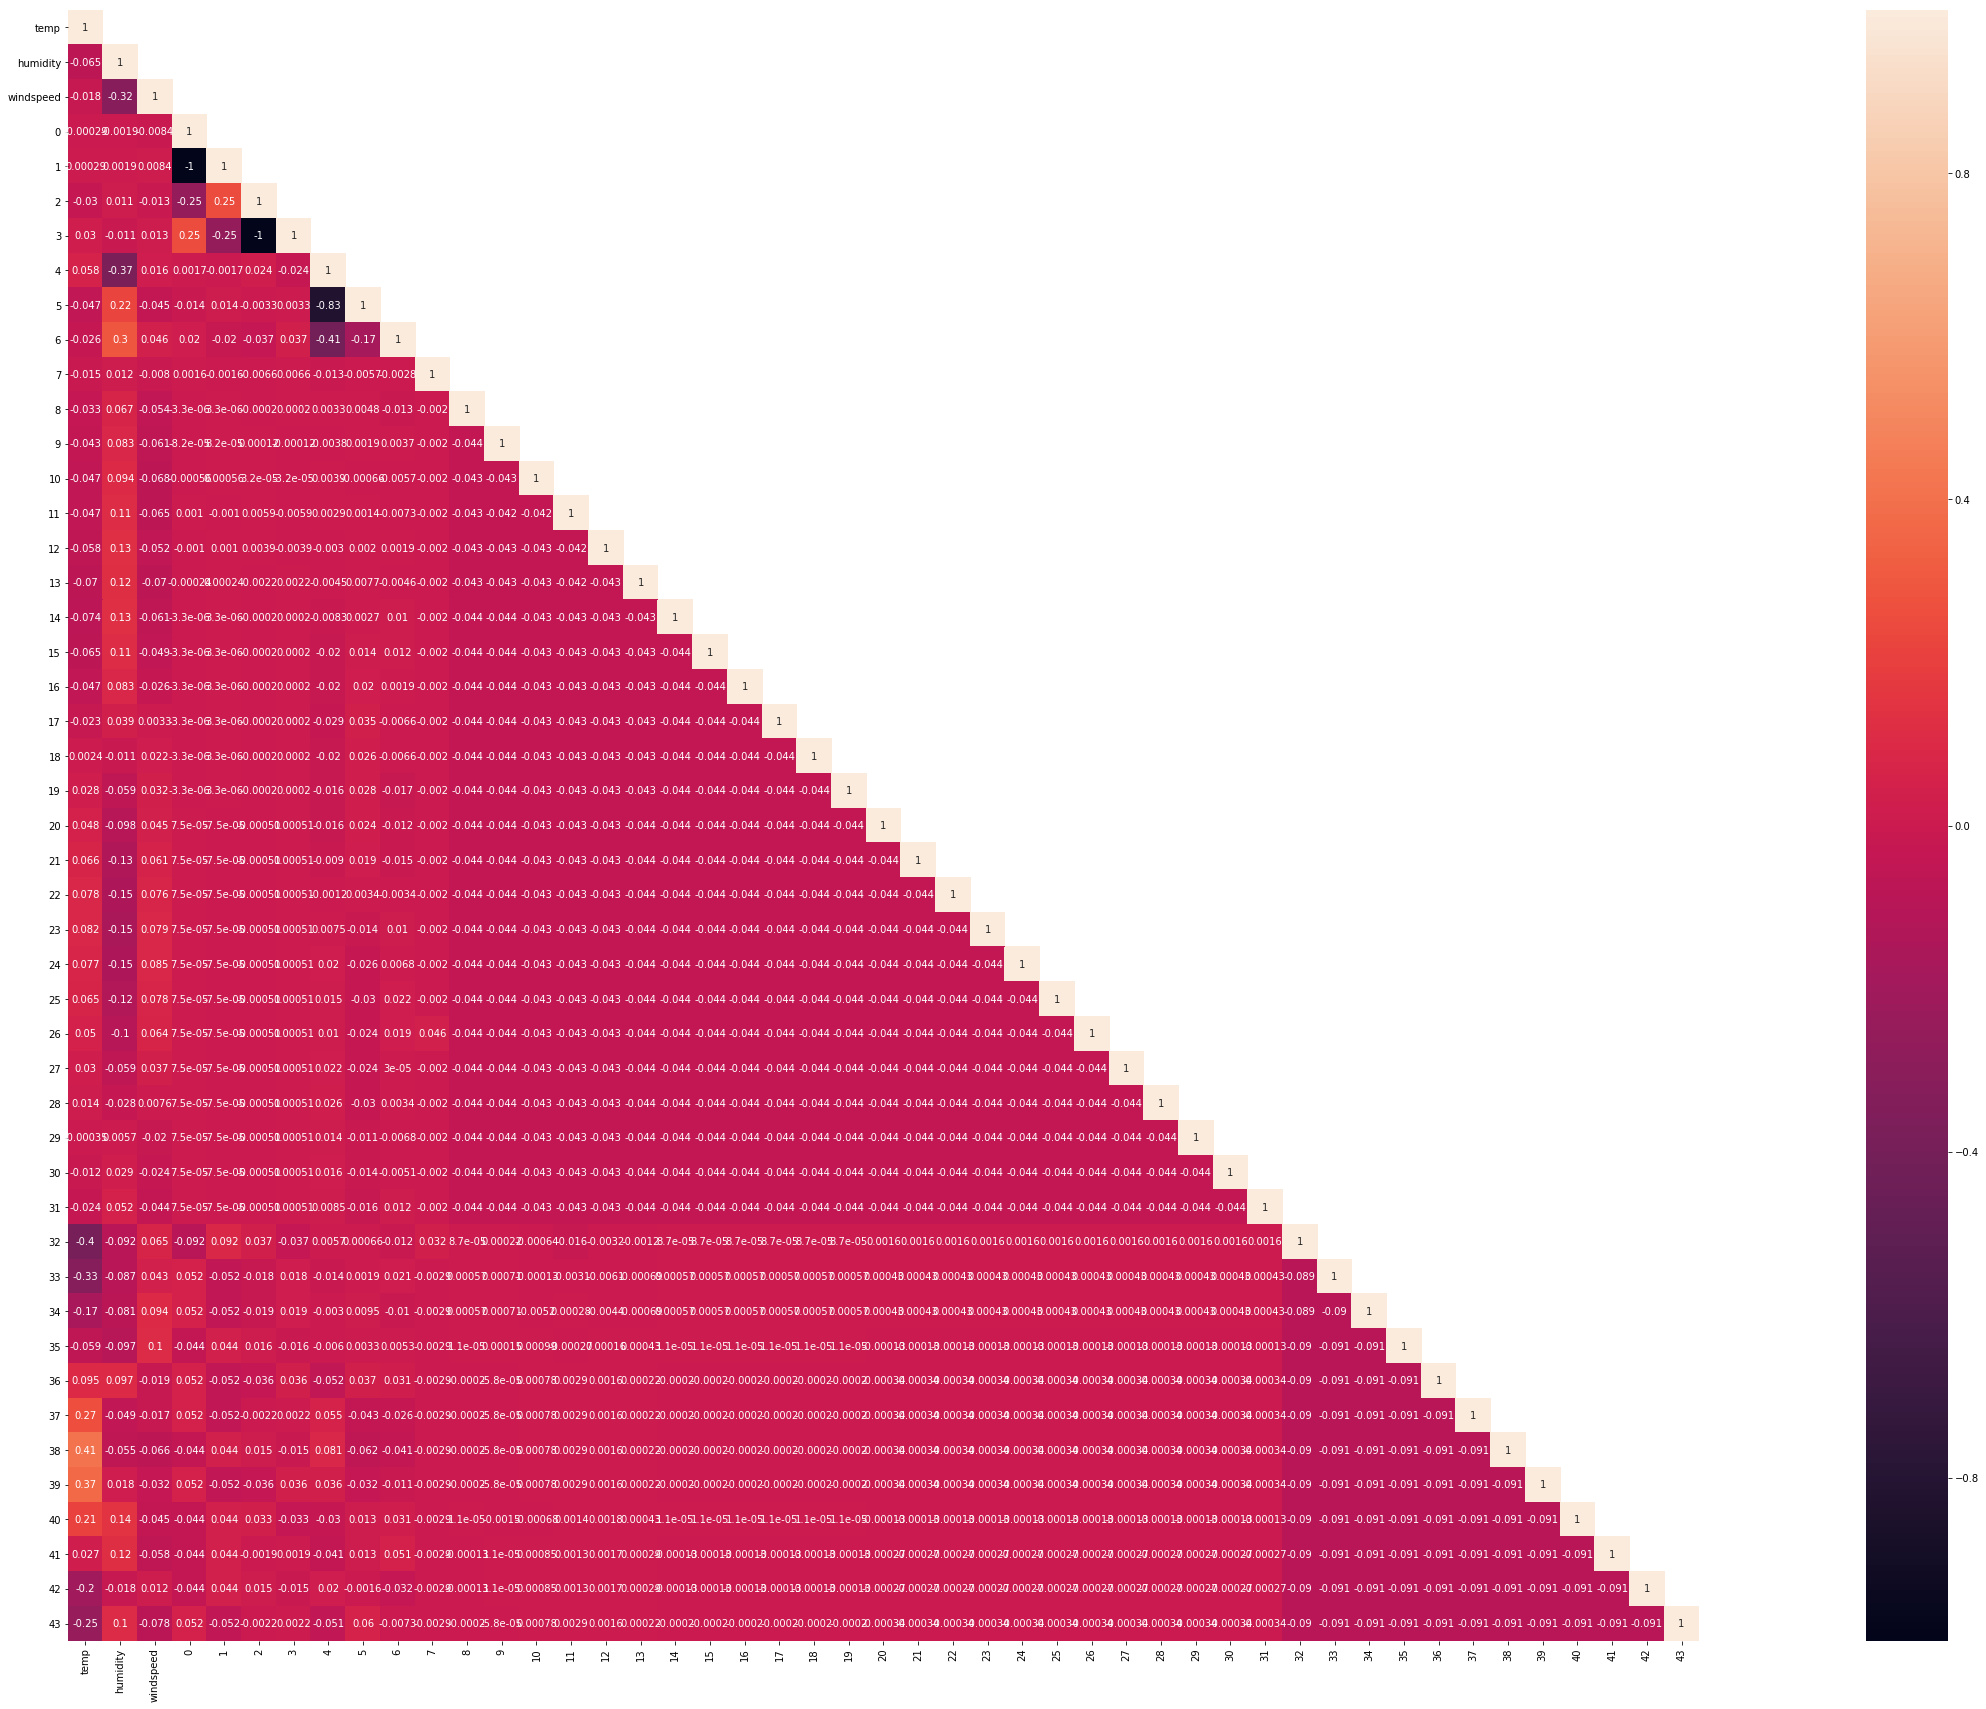

In [182]:
cor_mat = data.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(60,30)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

### выкидываем все что немного кореллирует

In [183]:
data = data.drop([1,3,5,32,33,38,39,'windspeed'], axis=1)

In [184]:
X_train, X_test, Y_train, Y_test = train_test_split(data, n, test_size=0.2, random_state=0)
print(data.shape, X_train.shape, X_test.shape)

(10886, 39) (8708, 39) (2178, 39)


In [185]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
print("mean squared error:", (mse(Y_test, Y_pred)))
scores = cross_val_score(lr, X_test, Y_test, cv=10)
print("mean cross validation r2-score:", np.mean(scores))

mean squared error: 12525.93616301097
mean cross validation r2-score: 0.6133347033085634
0.6230062527009765


### MSE незначительно повысился